<a href="https://colab.research.google.com/github/Asad-Afridi/Digital-Image-Processing/blob/main/DIP_CH_3_Intensity_Transformations_and_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOME BASIC INTENSITY TRANSFORMATION FUNCTIONS**

As an introduction to the intensity transformations, three basic types used frequently in image processing:

1. Linear (Negative and Identity Transformation)
2. Logarithmic (Log and Inverse-Log Transformation)
3. Power-Law (nth power and nth root transformation)

**Note:**

The identity function is the trivial case in which the input and output intensities are identical.

1. **Image Negatives**:
   The negative of an image with intesity levels in the range[0,L-1] is obtained by using the **Negative Transformation Function** of the form;
   
   s = L - 1 - r

   where 'r' is the intensity at specific pixel 'L' is the range last value of the range i.e 256 - 1 and 's' is the corresponding intensity at the specific pixel in output image.

   Reversing the intensity levels of a digital image in this manner produces the equavilant of a photographic negative. This type of processing is used in enhacement of white or gray detail embedded in dark regions of the image, especilly when the black areas are dominant in size.

   **Original Image:**
   

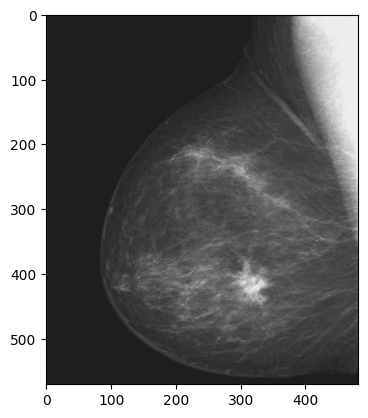

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03"
original_image = cv2.imread(path +"/Fig0304(a)(breast_digital_Xray).tif")
plt.imshow(original_image)

**Image Negative:**

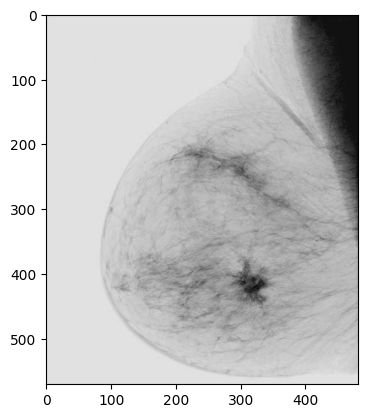

In [ ]:
L = 256
negative_image = L - 1 - original_image
plt.imshow(negative_image)

#**Log Transformation**

The general form of the log transformation is;

  s = c . log(1 + r)

  where c is a constant value.

  **Original Image**

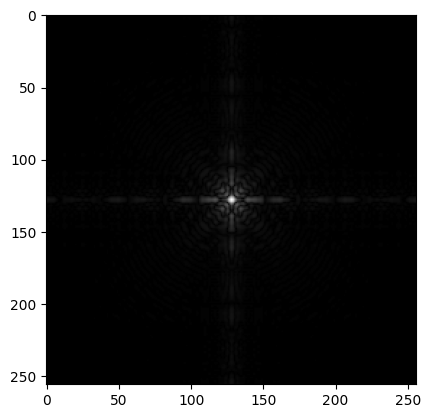

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
original_image = cv2.imread(path +"/Fig0305(a)(DFT_no_log).tif")
plt.imshow(original_image)

**After Log Transformation**

<ipython-input-2-4405d64c4c67>:4: RuntimeWarning: divide by zero encountered in log
  log_image[x,y] = 45 * np.log( original_image[x,y])


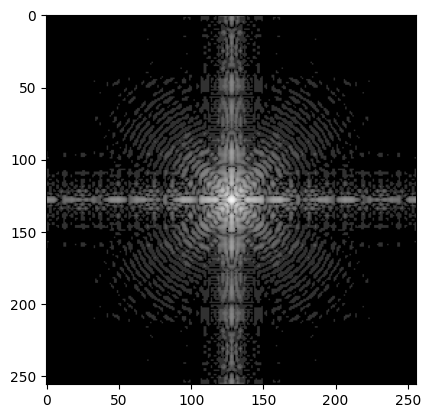

In [ ]:
log_image = np.zeros_like(original_image, dtype = original_image.dtype)
for x in range(original_image.shape[0]):
  for y in range(original_image.shape[1]):
    log_image[x,y] = 45 * np.log( original_image[x,y])
plt.imshow(log_image)

#**Power Law (Gamma) Transformation**

Power Law transformation have the form

s = c r^gamma

where c and gamma are positive constants.

**Original Image**

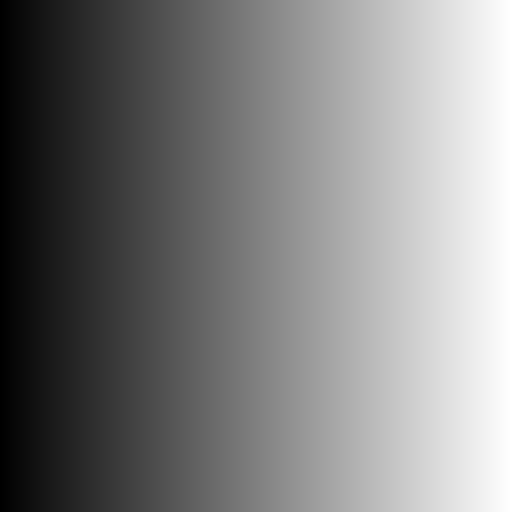

In [ ]:
original_image = cv2.imread("/content/Fig0307(a)(intensity_ramp).tif")
cv2_imshow(original_image)

Now put c = 255 and gamma of 2.5 and we get the image;

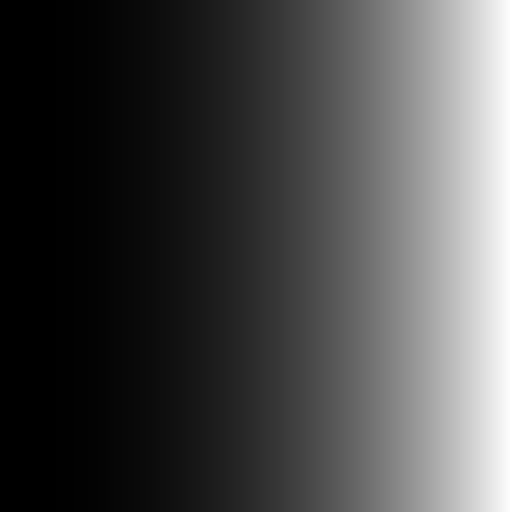

In [ ]:
c, gamma = 255, 2.5
transformed_image = c * ((original_image/255)**gamma)
cv2_imshow(transformed_image)

Now put gamma = 1/2.5 = 0.4

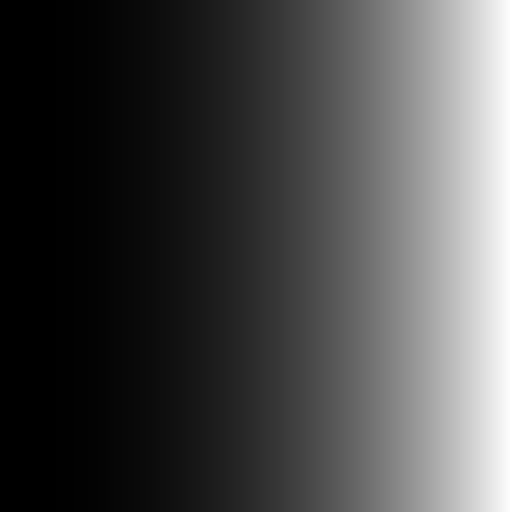

In [ ]:
gamma = 0.4
tranformed_image = c * ((original_image/255)**gamma)
cv2_imshow(transformed_image)

**Example of the contrast enhancement using power-law intensity transformation**

**Original Image**

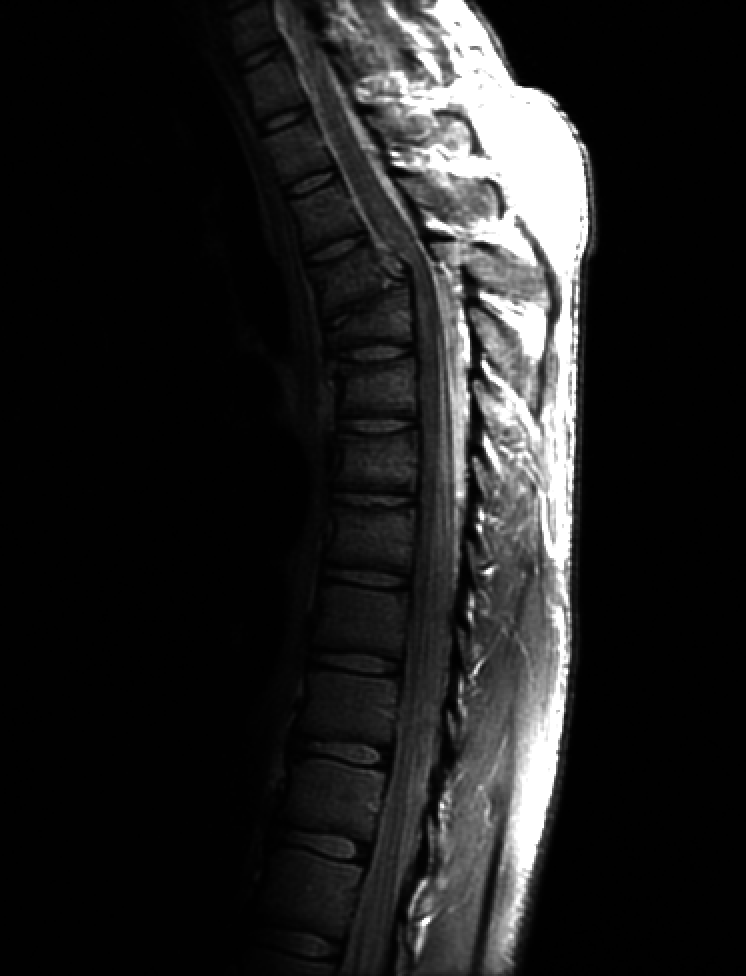

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/Fig0308(a)(fractured_spine).tif")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(original_image)

Now put gamma equal to 0.6 and look how the detail are clear.

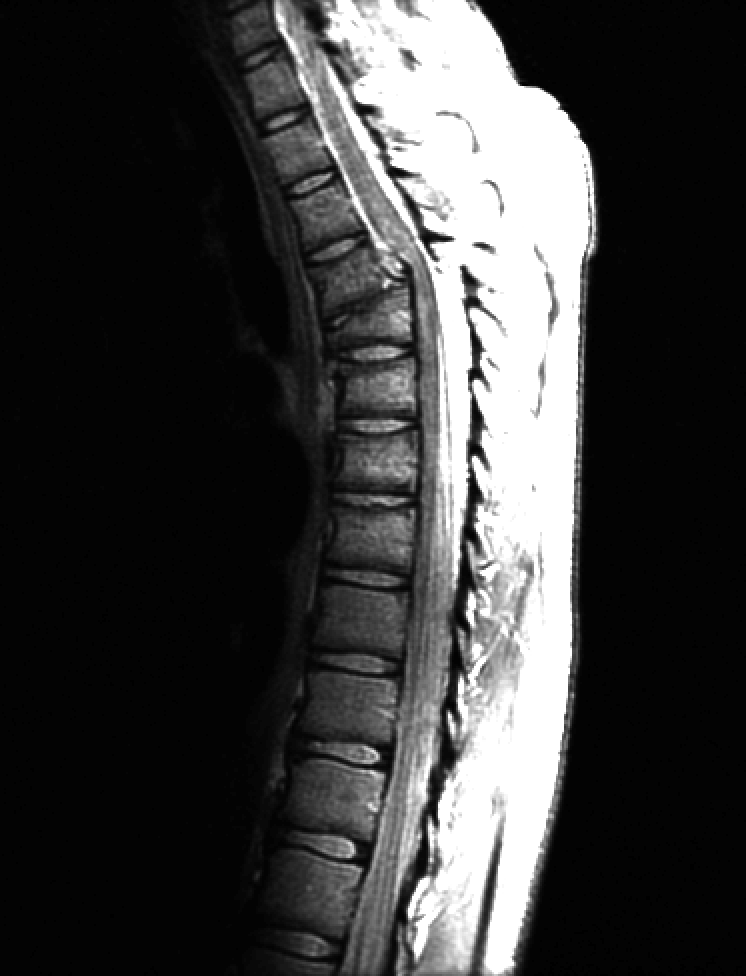

In [ ]:
gamma = 0.8
c = 255
tranformed_image = c * (original_image/255 ** gamma)
tranformed_image.astype(np.uint8)
cv2_imshow(tranformed_image)

#**Contrast Stretching**

Contrast stretching expands the range of intensity levels in an image so that it
spans the ideal full intensity range of the recording medium or display device.

General form of the contrast sretching is;

s(r)=(L-1/rmax-rmin)⋅(r-rmin)

**Original Image:**

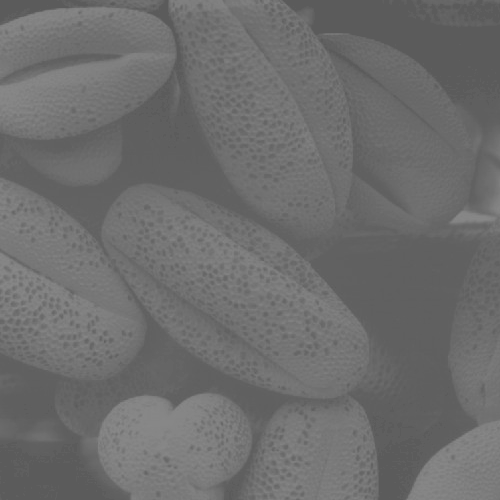

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/Fig0320(2)(2nd_from_top).tif")
cv2_imshow(original_image)

Now apply contrast stretching

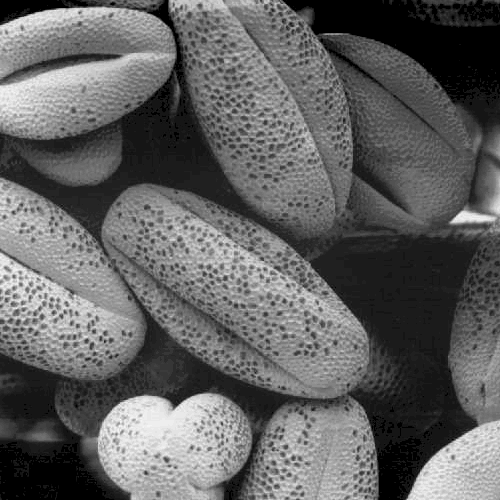

In [ ]:

transformed_image =  (255 / (original_image.max() - original_image.min())) * (original_image - original_image.min())
cv2_imshow(transformed_image)

Threshold tranformation function for a binary image

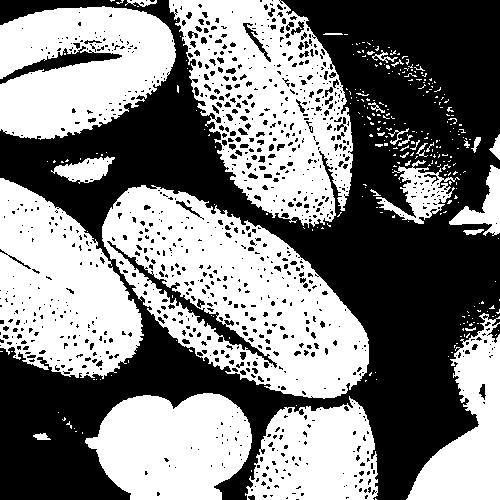

In [ ]:
m = np.mean(original_image)
threshold_1 = original_image > 109 # use m instead of 109
threshold_0 = original_image < 109
transformed_image = np.zeros_like(original_image, dtype = original_image.dtype)
transformed_image[threshold_1] = 255
transformed_image[threshold_0] = 0
cv2_imshow(transformed_image)

#**Intensity-Level Slicing**
**Original Image**

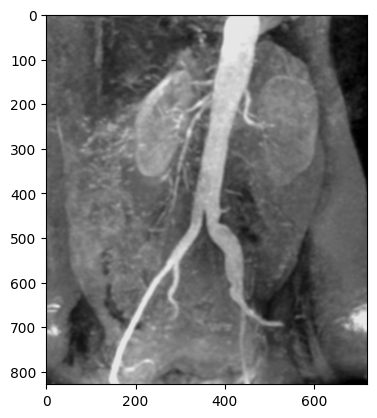

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

original_image = cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0312(a)(kidney).tif")
plt.imshow(original_image)

Now Use thresholding to create binary image
**Binary Image**

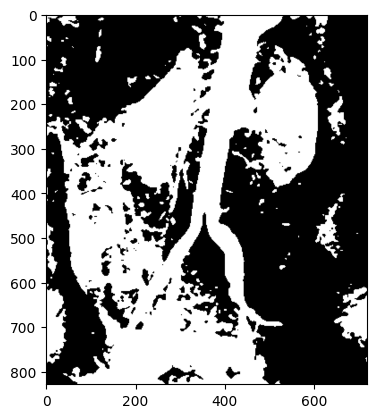

In [ ]:
mean = np.uint8(np.mean(original_image))
threshold = original_image > mean
binary_image = np.zeros_like(original_image)
binary_image[threshold] = 255
plt.imshow(binary_image)

Now implement intensity level slicing in specific location in image....

**Intensity Level Slicing**

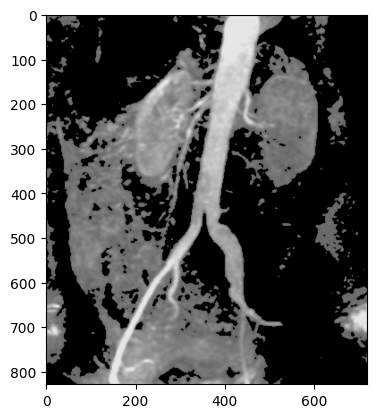

In [ ]:
threshold = original_image < mean
slicing_image = np.copy(original_image)
slicing_image[threshold] = 0
plt.imshow(slicing_image)

#**Bit-Plane Slicing**

For an 8-bit image, a pixel value of 0 is represented as 00000000 in binary form and 255 is encoded as 11111111. Here, the leftmost bit is known as the most significant bit (MSB) as it contributes the maximum. e.g. if MSB of 11111111 is changed to 0 (i.e. 01111111), then the value changes from 255 to 127. Similarly, rightmost bit is known as Least significant bit (LSB).

In Bit-plane slicing, we divide the image into bit planes. This is done by first converting the pixel values in the binary form and then dividing it into bit planes. Let’s see by an example.

Converting Original Image to its nth-bit plane

**Original_image**

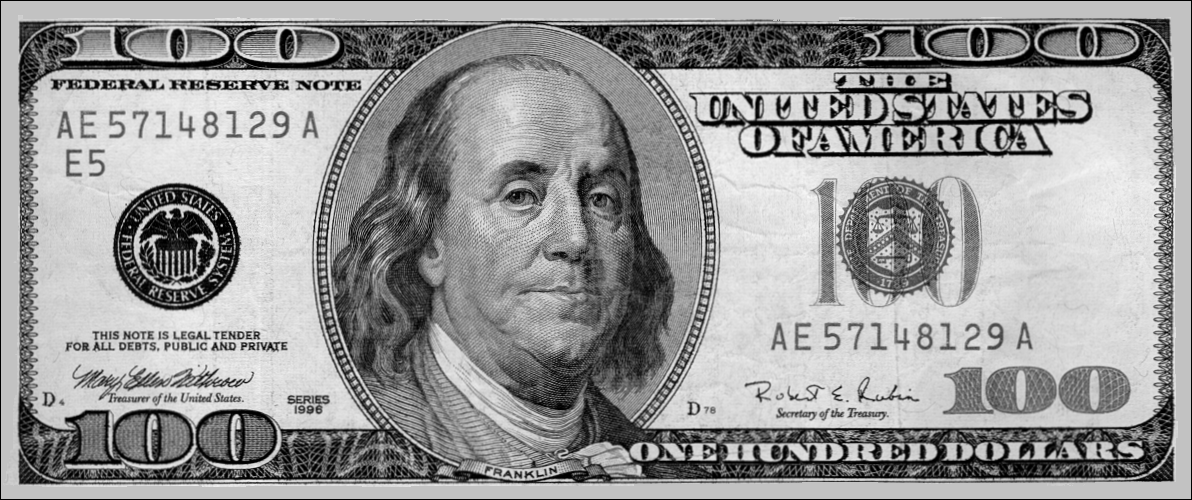

In [ ]:
import cv2
import numpy as np
import matplotlib as plt
from google.colab.patches import cv2_imshow
original_image = cv2.imread('/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif',cv2.IMREAD_GRAYSCALE)
cv2_imshow(original_image)

Now first Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
Multiply with 2^(n-1) and reshape to reconstruct the bit image.

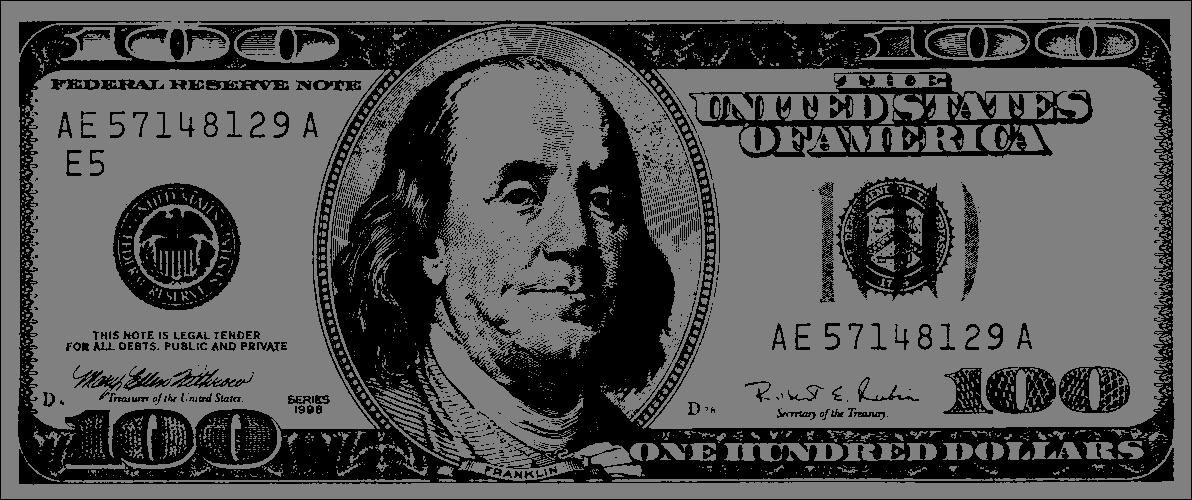

In [ ]:
binary_pixels = []
for row in range(original_image.shape[0]):
  for col in range(original_image.shape[1]):
    binary_pixels.append(np.binary_repr(original_image[row][col], width = 8))
def const_bit_img(bit_no):
  return (np.array([int(bit[7 - (bit_no-1)]) for bit in binary_pixels],dtype = np.uint8) * 2**(bit_no-1) ).reshape(original_image.shape[0],original_image.shape[1])
cv2_imshow(const_bit_img(8))

**Bit-7 plane Image**
Now we will construct bit 7 image

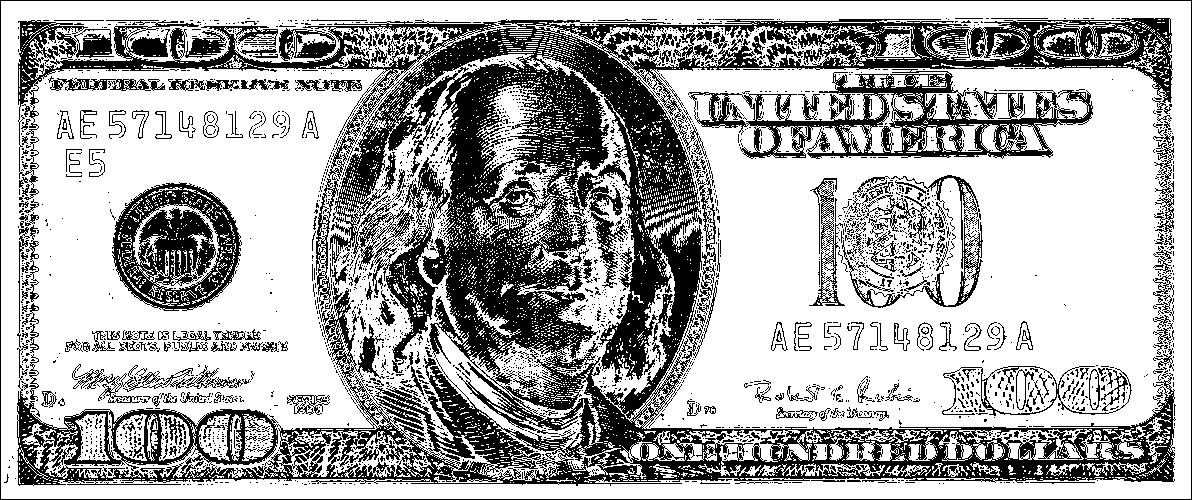

In [ ]:
cv2_imshow(const_bit_img(7))

And for bit 6,5,4,3,2 and 1

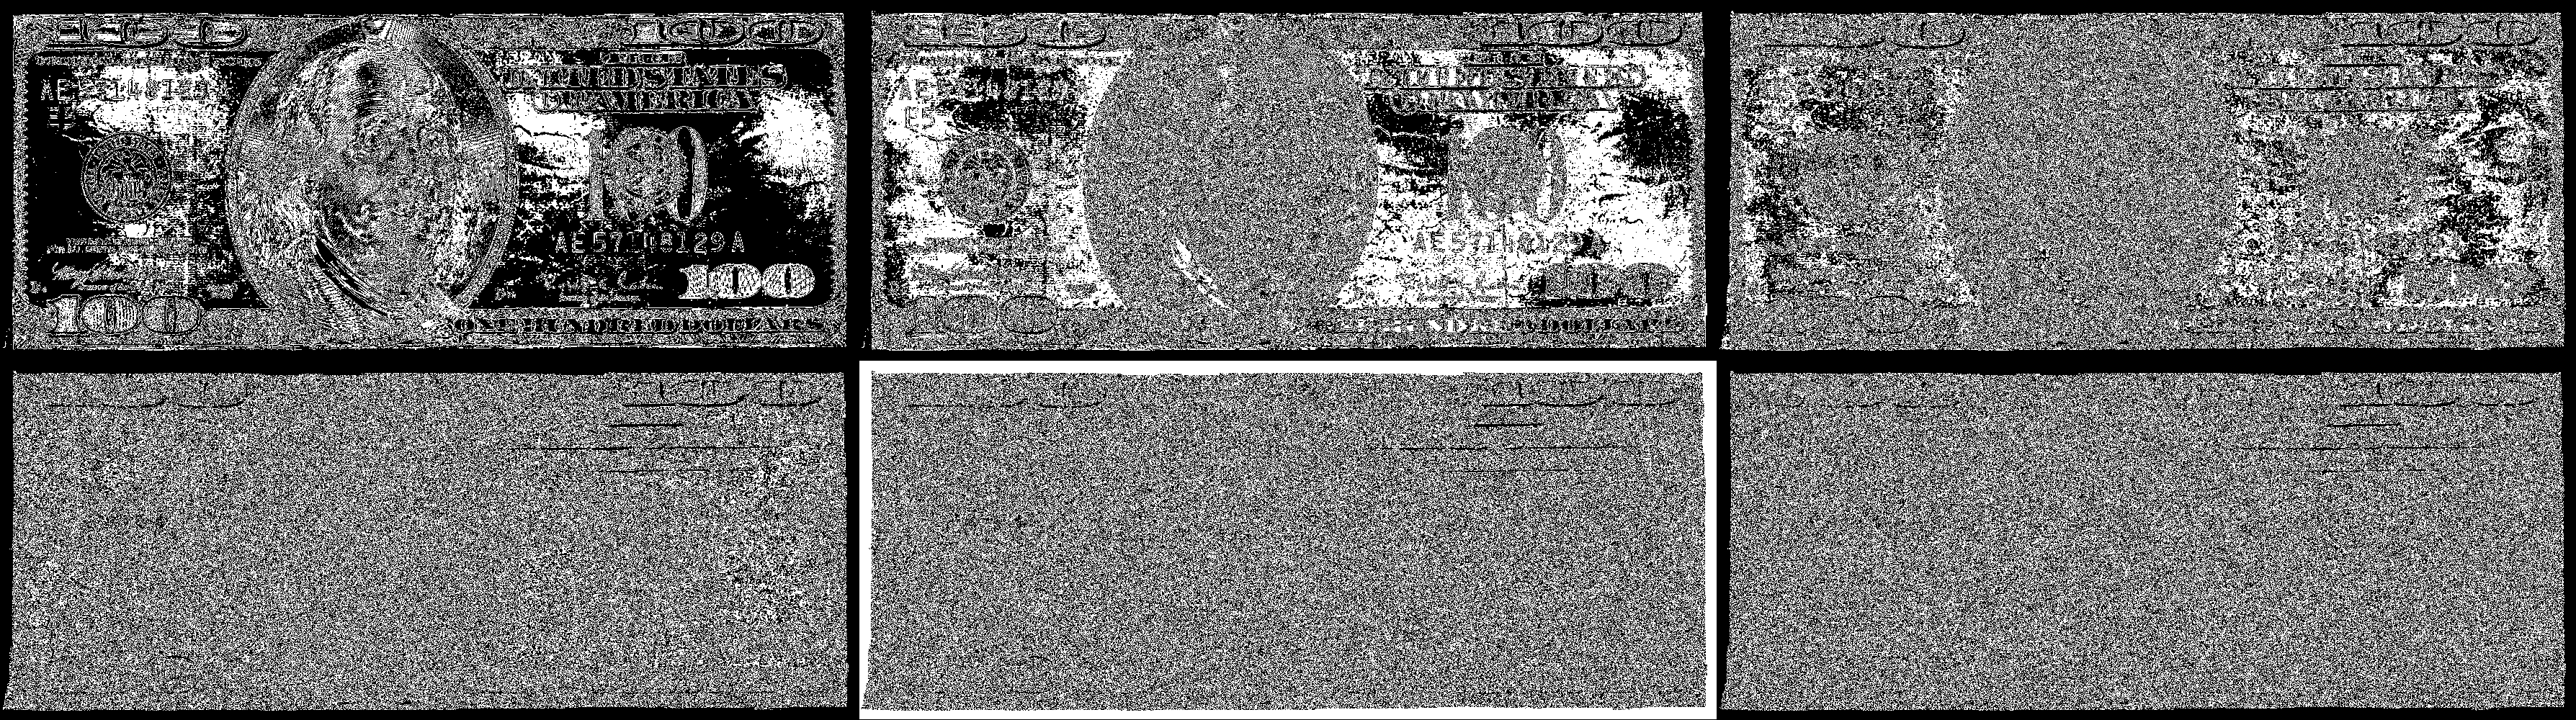

In [ ]:
bits_img = []
for i in range(6,0,-1):
  bits_img.append(const_bit_img(i))
final1 = cv2.hconcat(bits_img[0:3])
final2 = cv2.hconcat(bits_img[3:])
final = cv2.vconcat([final1,final2])
cv2_imshow(final)

Now reconstruct image from bit 8 and 7

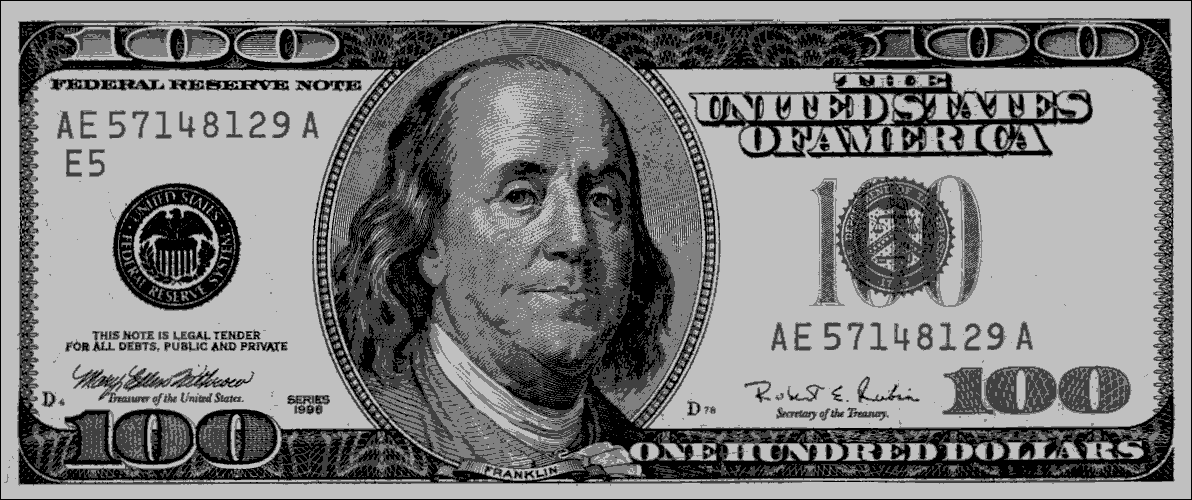

In [ ]:
def reconst_bit_img(bit_no):
  return (np.array([int(bit[7 - (bit_no-1)]) for bit in binary_pixels],dtype = np.uint8) * 2**(bit_no-1) ).reshape(original_image.shape[0],original_image.shape[1])
bit8 = reconst_bit_img(8)
bit7 = reconst_bit_img(7)
rec_img87 = bit8 + bit7
cv2_imshow(rec_img87)

And from bit plane 8,7 and 6

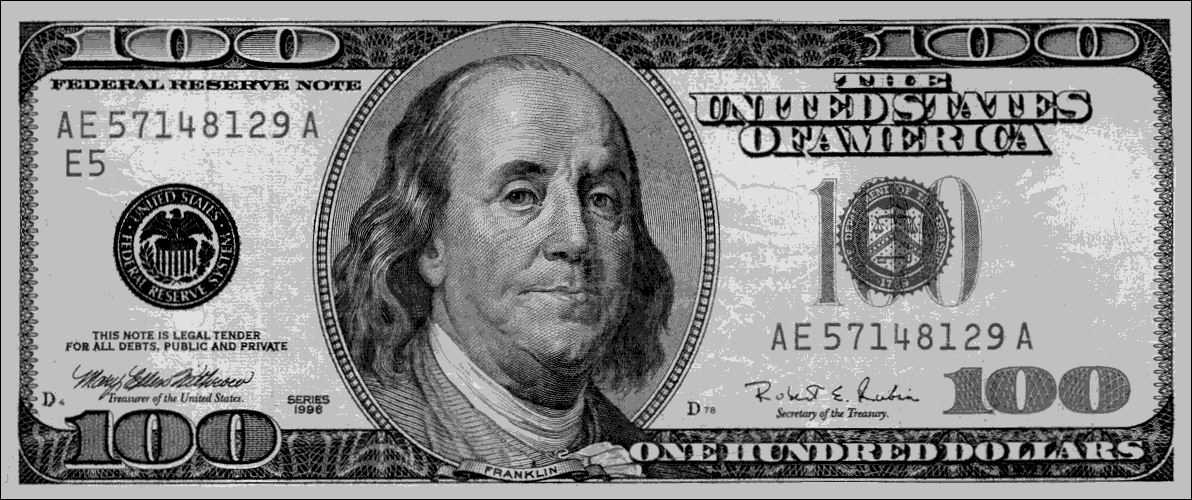

In [ ]:
bit6 = reconst_bit_img(6)
rec_img876 = bit8 + bit7 + bit6
cv2_imshow(rec_img876)

And now from bit8,7,6,5

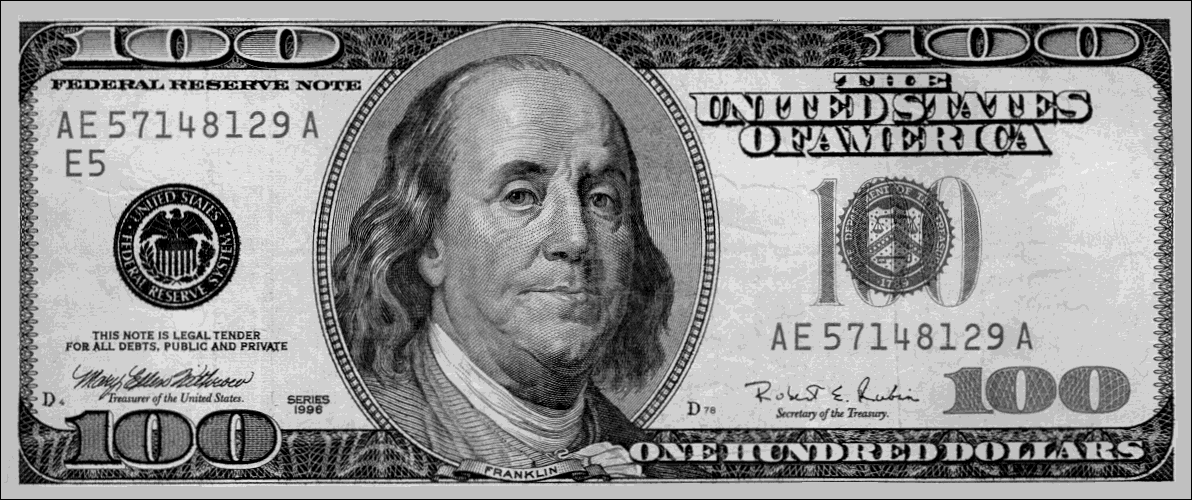

In [ ]:
bit8 = reconst_bit_img(8)
bit7 = reconst_bit_img(7)
bit6 = reconst_bit_img(6)
bit5 = reconst_bit_img(5)
rec_img8765 = bit8 + bit7 + bit6 + bit5
cv2_imshow(rec_img8765)

For visual difference of the reconstruction of the image from different bits

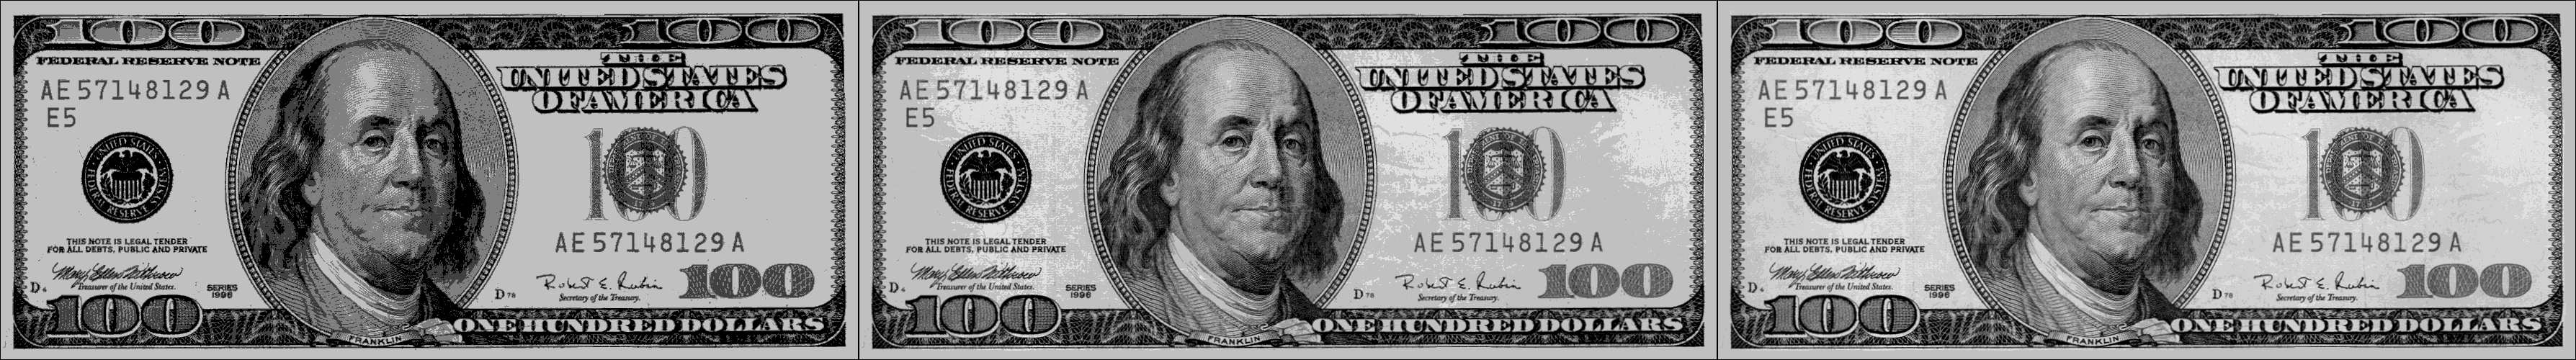

In [ ]:
final_images = cv2.hconcat([rec_img87,rec_img876,rec_img8765])
cv2_imshow(final_images)

#**Histogram Equalization**

sk = T(rk) = L-1 summation j = 0 to k (pr(rj))

pr(rk) = nk / MN
where nk is the number of pixel with intenisty vlaue k and MN is the number of total pixels in image.

Steps:

1. First find the nk of the pixel
2. divide nk by MN to obatined pr(rk)
3. then use the first formula to mapp each pixel in the output image.

**Original Image**

Dark Image

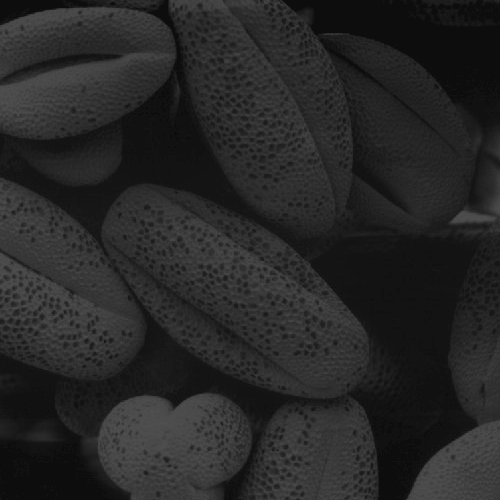

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab.patches import cv2_imshow
image=cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0316(4)(bottom_left).tif",cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

**Equalized Image**

Brighter Image due to its histogram equalization

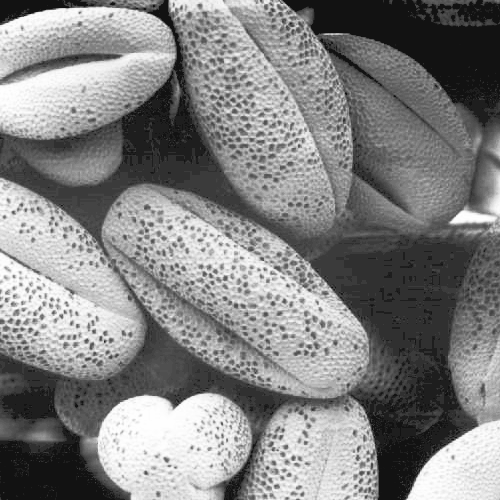

In [ ]:
def hist_equal(image, L = 256):
    pixels, nk = np.unique(image, return_counts = True)
    m,n = image.shape
    mn = m*n
    pr_rk = []
    for n in nk:
      pr_rk.append(n/mn)
    cdf = []
    temp = 0
    for i,val in enumerate(pr_rk):
      temp = temp + val
      cdf.append(temp)
    summation = dict(zip(pixels, cdf))
    equalized_image = np.zeros_like(image)
    for (h,w),x in np.ndenumerate(image):
        equalized_image[h][w] = np.floor((L-1)*summation[x])
    return equalized_image
cv2_imshow(hist_equal(image))

#**Histogram of original and Enhanced Image**

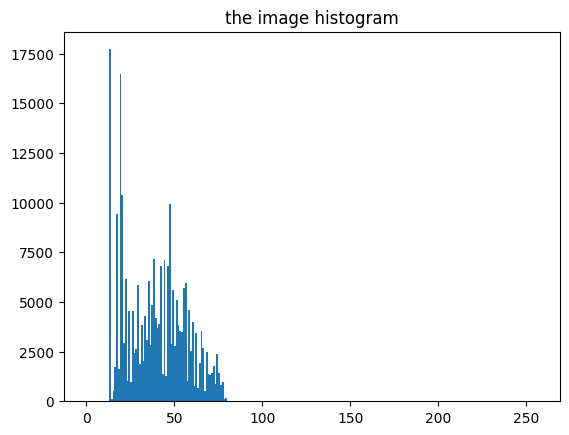

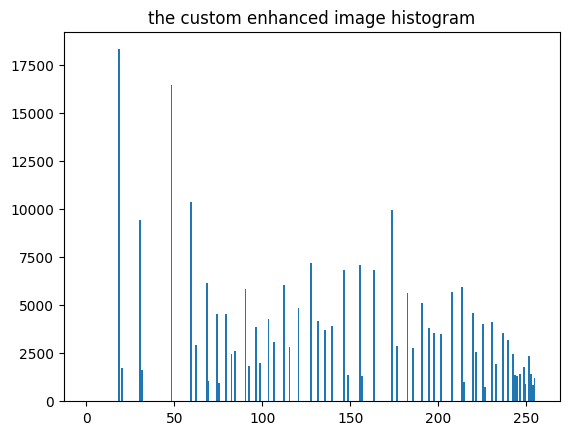

In [ ]:
plt.hist(image.ravel(),256,[0,256])
plt.title('the image histogram')
plt.show()


plt.hist(hist_equal(image).ravel(),256,[0,256])
plt.title('the custom enhanced image histogram')
plt.show()

Now lets try another images and perform histogram equalization on that...

**Original_Images**

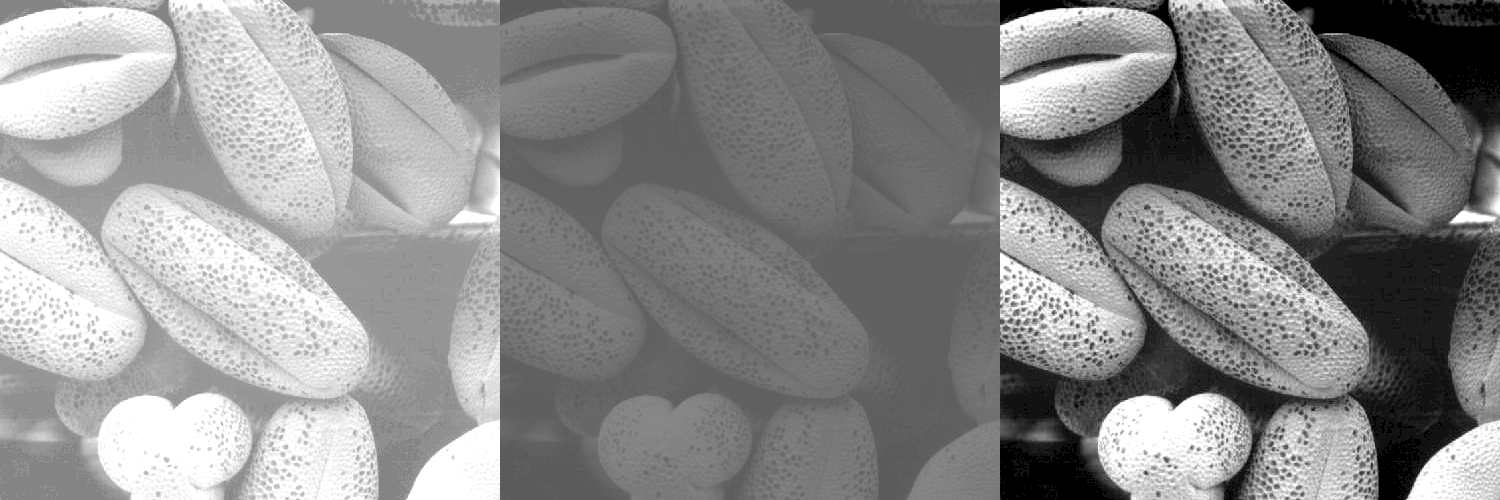

In [ ]:
import cv2, numpy as np, matplotlib as plt
from google.colab.patches import cv2_imshow
path = "/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03"

image1 = cv2.imread(path + '/Fig0320(1)(top_left).tif',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(path +'/Fig0316(2)(2nd_from_top).tif',cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread(path +'/Fig0320(3)(third_from_top).tif',cv2.IMREAD_GRAYSCALE)
cv2_imshow(cv2.hconcat([image1,image2,image3]))

Now their equalized histogram according is...

**Equalized Hists**

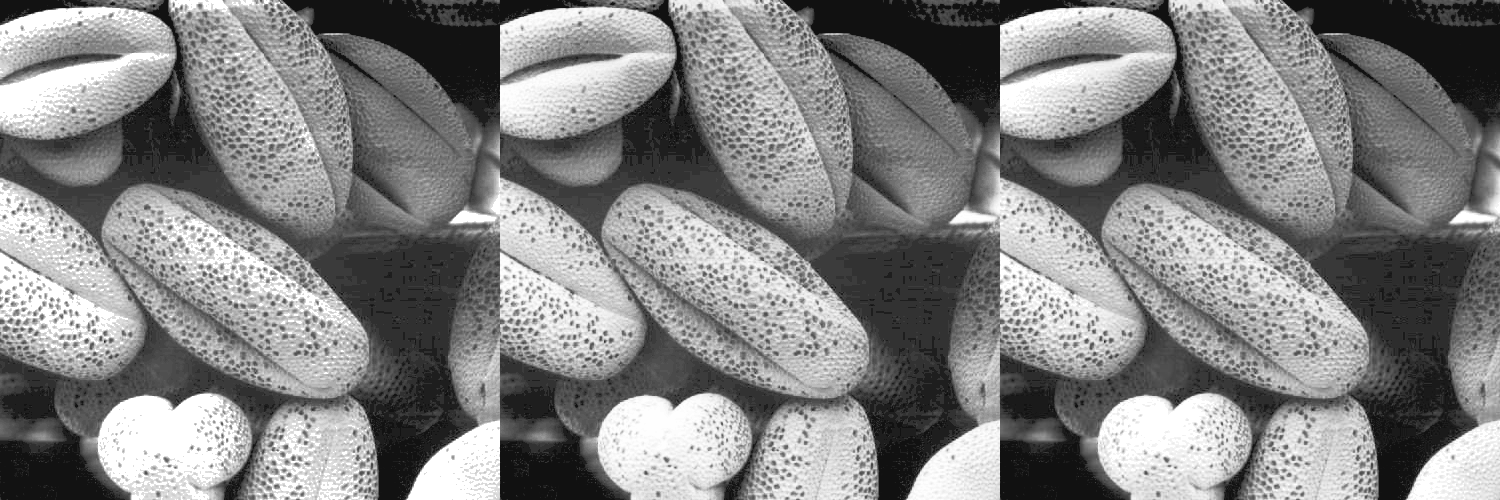

In [ ]:
cv2_imshow(cv2.hconcat([hist_equal(image1),hist_equal(image2),hist_equal(image3)]))

and their equalized histograms are....

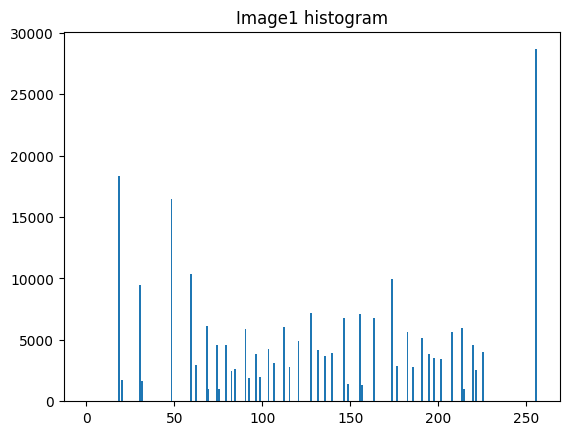

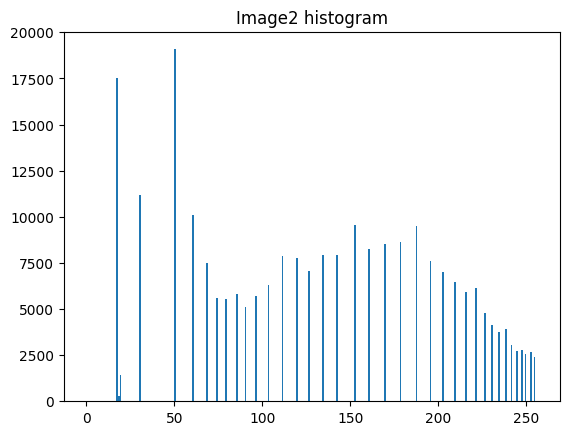

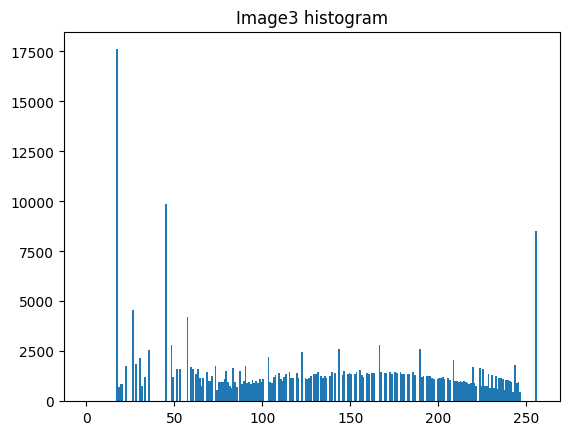

In [ ]:
plt.hist(hist_equal(image1).ravel(),256,[0,256])
plt.title('Image1 histogram')
plt.show()

plt.hist(hist_equal(image2).ravel(),256,[0,256])
plt.title('Image2 histogram')
plt.show()

plt.hist(hist_equal(image3).ravel(),256,[0,256])
plt.title('Image3 histogram')
plt.show()

#**Lowpass Box Filtering**:
Now to use box filtering we must remembering something,
1. define an m x n filter by the filter must be odd.(3x3)
2. all the values of the filter coefficient must be same in this case it will be 1's.
3. There will be a normaize constant infront of the kernal whose value will be 1 divied by the sum of the values of the coefficient of kernal. This can be 1/mn if there is only 1's value used in kernal.

For creating kernal we also specify 'a' and 'b' where a = m-1/2 and b = n-1 / m,n odd integer.

We also pad m-1 rows left and right side of the image and n-1 cols up and down side of the image

As we know that the formula used for convolution... we implement here..

w * f(x,y) = summation s = -a to and summation t = -b to b       
{w(s,t) f(x-s, y-t)}


**Original Image**

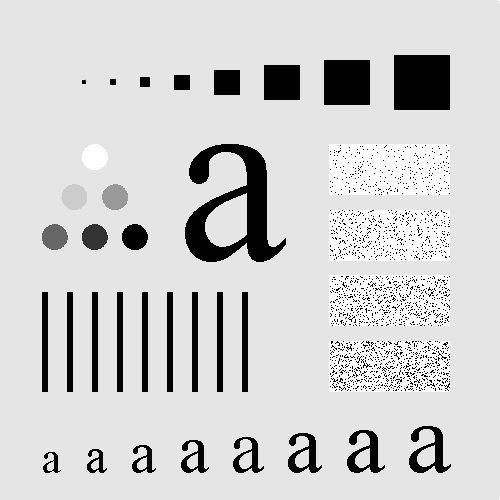

In [ ]:
import cv2,numpy as np, matplotlib as plt
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif",cv2.IMREAD_GRAYSCALE)
cv2_imshow(original_image)

#**Box Filtering with 3 x 3**

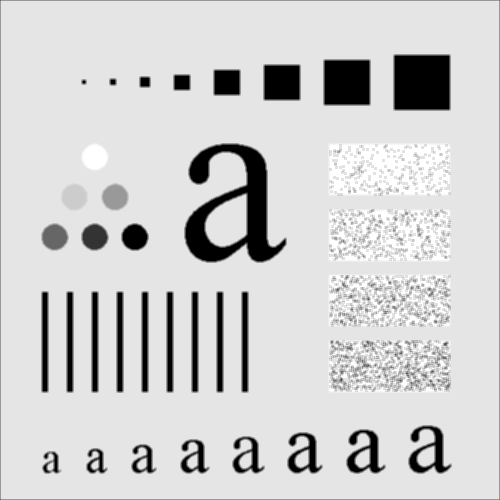

In [ ]:
def box_filter(image,m):
    pad_rows = m//2
    # Now padd the image with specified rows and cols
    padded_image = np.pad(image,pad_width=pad_rows, mode='constant', constant_values=0)
    blur_image = np.zeros_like(image)
    for x in range(image.shape[0]):
      for y in range(image.shape[1]):
        window = padded_image[x : x + m, y : y + m] # create window same as the size of the filter kernal
        value = np.sum(window) # in this step we multiply the window with the kernal but in our case the kernal values are 1's so it turn will back to the window... thus we simple wrote the window
        blur_image[x,y] = int(value/(m*m))
    return blur_image
cv2_imshow(box_filter(original_image,3))

**Box Filtering with kernal 11 x 11**


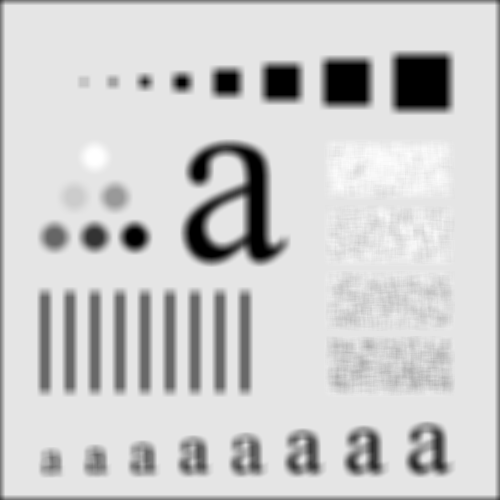

In [ ]:
cv2_imshow(box_filter(original_image,11))

**Box Filtering with Kernal 21 x 21**

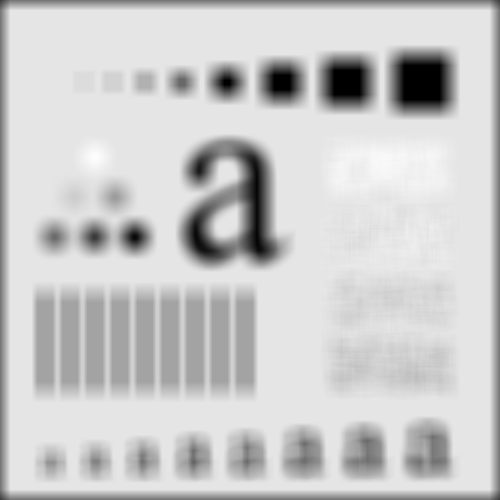

In [ ]:
cv2_imshow(box_filter(original_image,21))

#**Lowpass Gaussian Filtering**:

Guassian filter kernel is circularly symmetric kernel mean that it is independent of the kernel orientation.

Gaussian Filter can be made with the help of the Gaussian Function discussed below...

w(s,t) = G(s,t) = Ke^ - ((s^2 + t^2)/ 2sigma^s)
where K can be equal to K = 1 / 2pi * sigma^2

but here in these example we set K = 1.

**Original Image**

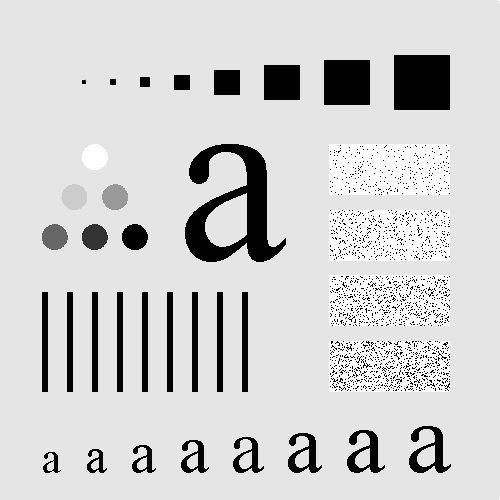

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
original_image = cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif", cv2.IMREAD_GRAYSCALE)
cv2_imshow(original_image)

No we have to apply guassian filter to the image to obtained the same result as the box filter can give us...

But for Gaussian filter we need to choose a size greater than the box filter as we know that box filter give weight same to each pixels of the image as their are identical coefficient used in box filter,the values of Gaussian kernel coefficients (and hence their effect) decreases as a function of distance from the kernel center.

Thus for a Gaussian kernel of size 21 x 21 which is the size of the kernal to obtained the result as same for box filter of size 21x21 and hence we use **sigma = 3.5**.

**Blur Image with Gaussian filter Size 21 x 21 sigma = 3.5**

**Convolution Section**

In [ ]:
def convolution(image, kernel, average=False):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = (kernel_row - 1) // 2
    pad_width = (kernel_col - 1) // 2

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    return output

**Guassian Kernal Section**

In [ ]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    return kernel_2D

**Guassian Blur Section**

Make a Guassian blur function to perform guassian blurring with the help of the above functions defined

In [ ]:
import math
def gaussian_blur(image, kernel_size, sigma, is_show = False):
    kernel = gaussian_kernel(kernel_size, sigma=sigma)
    blur_image = convolution(image, kernel, average=True,)
    if is_show:
      plt.figure(figsize= (20,30))
      plt.subplot(1,3,1)
      plt.title(f"Kernal{kernel_size} x {kernel_size}")
      plt.imshow(kernel, cmap='gray')
      plt.axis('off')

      plt.subplot(1,3,2)
      plt.title('Original Image')
      plt.imshow(original_image, cmap='gray')
      plt.axis('off')

      plt.subplot(1,3,3)
      plt.title('Blurred Image')
      plt.imshow(blur_image, cmap='gray')
      plt.axis('off')
    else:
      return blur_image


**Gaussian Blurr using kernel 21 x 21 with sigma 3.5**

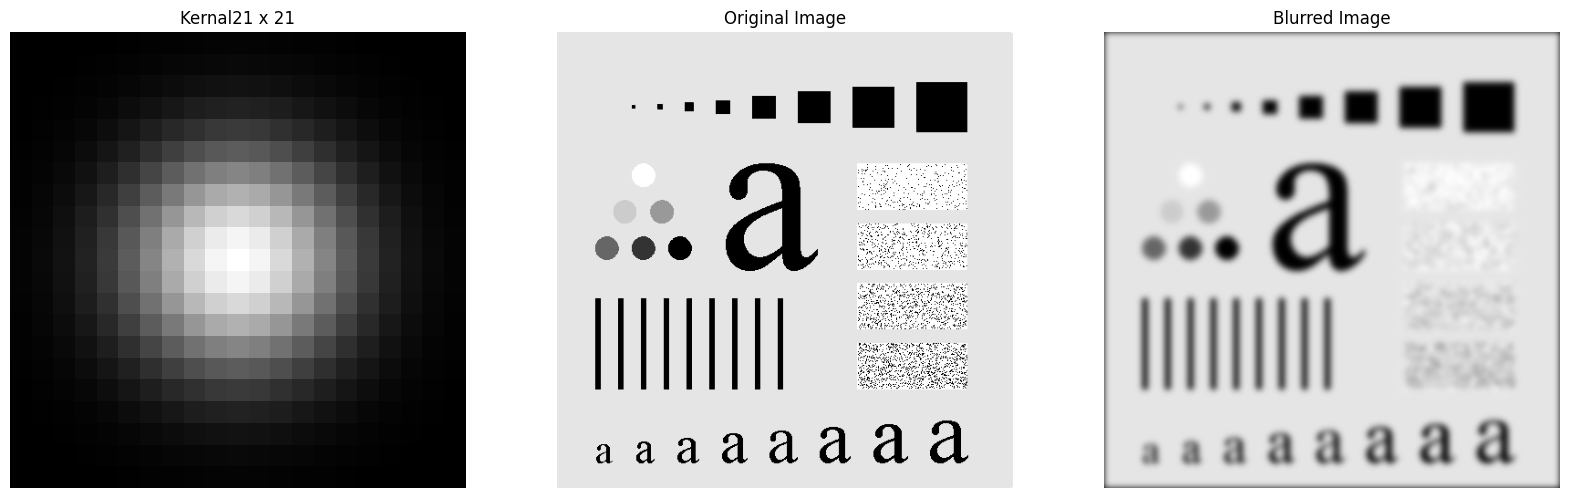

In [ ]:
kernel_size = 21
sigma = 3.5
gaussian_blur(original_image, kernel_size, sigma, is_show = True)

Now from the above resultant image we conclude that the gaussian filter with size same for box filter i. 21x21 gives less blurred result than box filter. A little experimentation would show that we need a simga = 7 to achieve the result so to get the nearest odd integer size kernal . 6 * sigma => 6 * 7 , so we need a gaussian kernal of size 43 x 43... as 6 * 7 = 42 so we will git the odd integer size i.e 43 ... but why not 41... as there is ceil use like ceil(6 * sigma) so this is why we will choose greater integer.

**Blur Image with Gaussain filter size 43 x 43 and simga = 7**

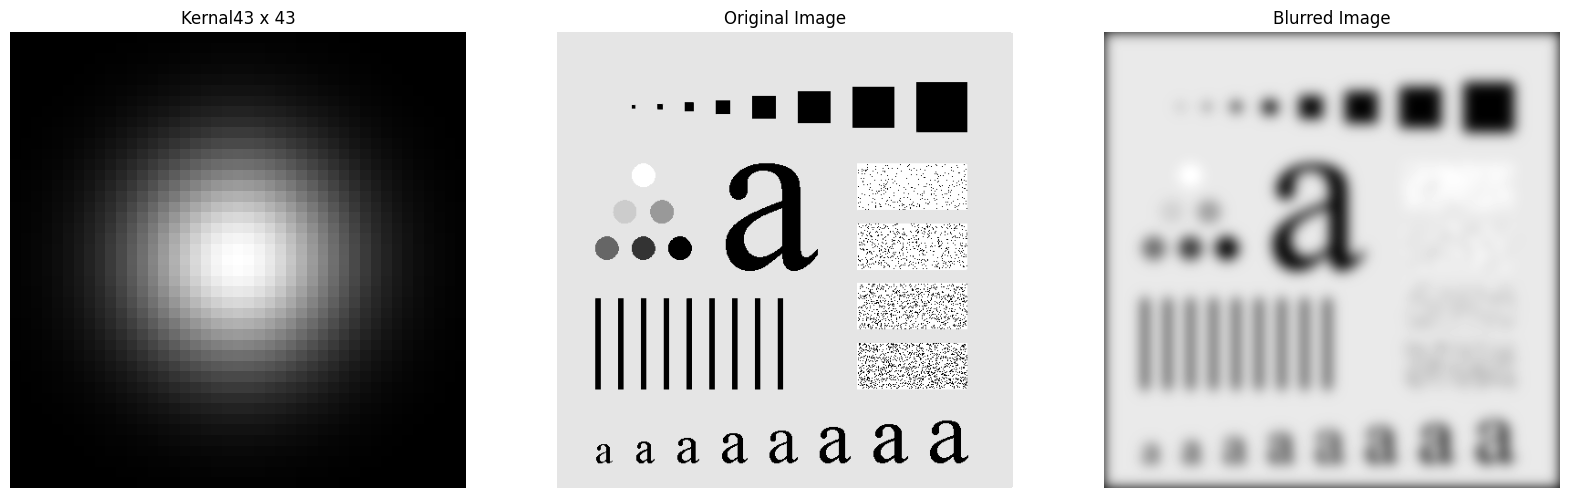

In [ ]:
kernel_size = 43
sigma = 7
gaussian_blur(original_image, kernel_size, sigma, is_show = True)

There will no much difference if we use the kernal size greater than ceil(6 * simga). To demonstrate this, we will choose a guassian kernal;
1. size = 85 x 85
2. sigma = 7

and we will compare to result gained from the gaussian kernel size 43 x 43 with sigma = 7.

**Blur Image with Gaussian kernel size 85 x 85 with sigma 7**

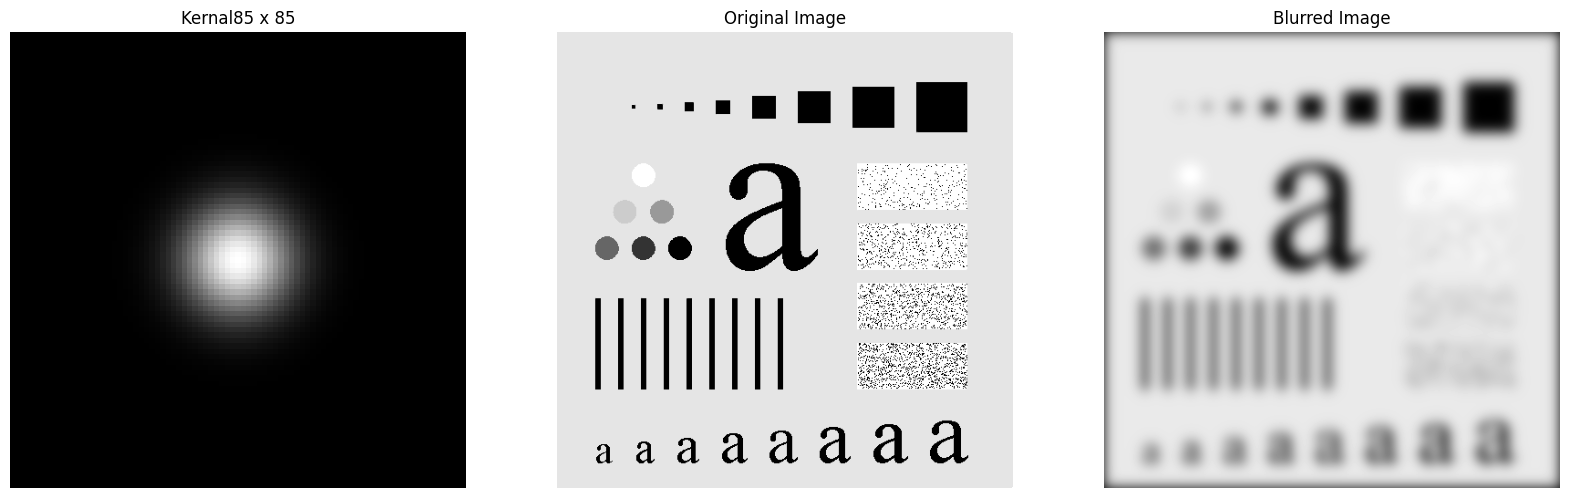

In [ ]:
kernel_size = 85
sigma = 7
gaussian_blur(original_image,kernel_size,sigma, is_show = True)

As you can see there is no additional blurring in the resultant image than a blur image with gaussain kernel size 43 with sigma 7. If you want to see the differnece let subtract the the 43 x 43 gaussian blur image from 85 x 85 gaussian blur image.

**Subract Image**

(-0.5, 499.5, 499.5, -0.5)

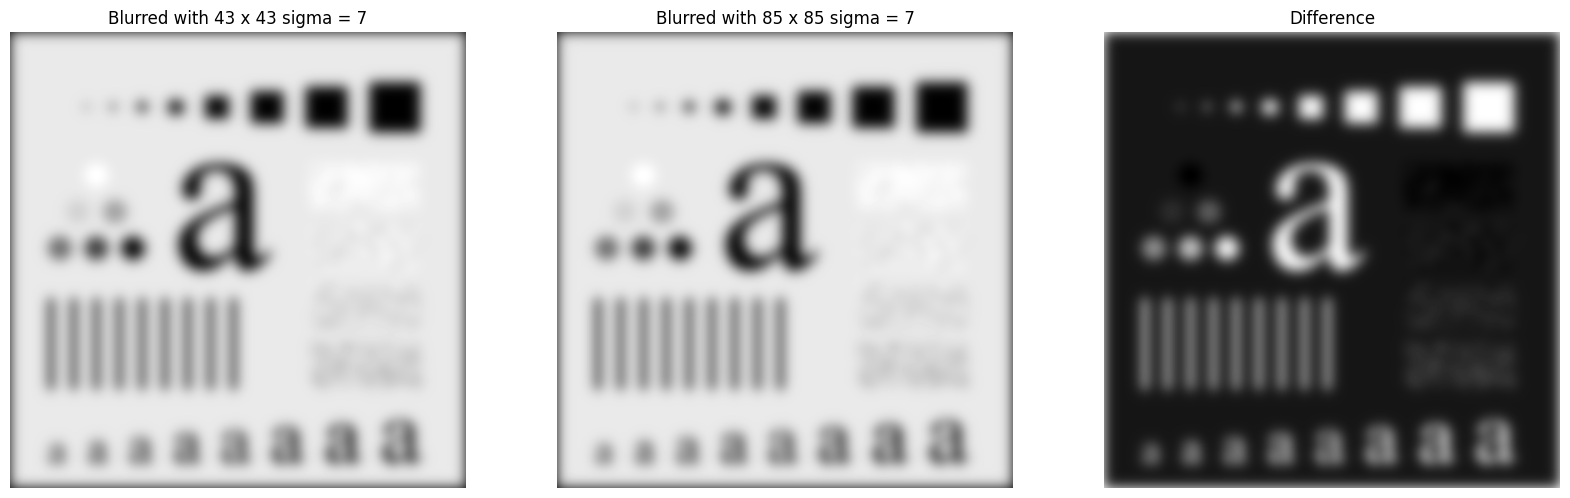

In [ ]:
blurred_43 = gaussian_blur(original_image, 43, 7)
blurred_85 = gaussian_blur(original_image, 85, 7)
difference = np.subtract(blurred_85, blurred_43)

plt.figure(figsize= (20,20))
plt.subplot(1,3,1)
plt.title('Blurred with 43 x 43 sigma = 7')
plt.imshow(blurred_43, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Blurred with 85 x 85 sigma = 7')
plt.imshow(blurred_85, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Difference')
plt.imshow(difference, cmap ='gray')
plt.axis('off')

It will give the dark result but there is slight problem as i have adjust the shape of the two image because these were not broadcatable. and by changing the shape of the images so the pixels valuse move from its position like when at index [50,50] intensity is 100, now after the shape changing the intensity at the same index i.e [50,50] is like 50. So if we subract 50 from 100 we get the result 50 which is quiet gray. But we want result 0. And this is possible and we will cover next soon.

#**Comparison of Box and Gausian filter smoothing Characteristics**

(-0.5, 209.5, 208.5, -0.5)

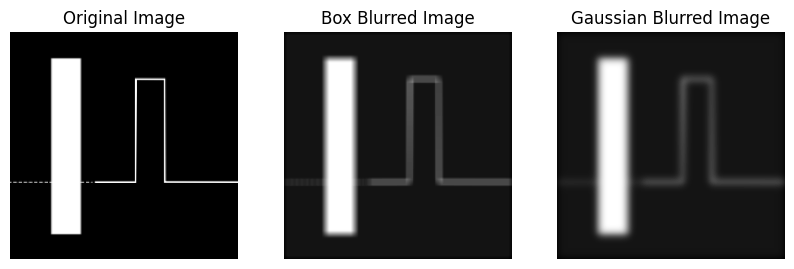

In [ ]:
import numpy as np, matplotlib.pyplot as plt, cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread('/content/Screenshot 2024-02-08 220527.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)
blurred_with_box = box_filter(original_image,7)
blurred_with_gaussian = gaussian_blur(original_image,21,3.4)

plt.figure(figsize = (10,20))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blurred_with_box, cmap = 'gray')
plt.title('Box Blurred Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blurred_with_gaussian, cmap = 'gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

As you can see clearly in the above figure that the image which is smooth with box filter have less smooth conrner around the rectangle while the image soothen with gaussian filter has much smoth corner around the ractangle. So if we need less smoothing around the edge we will use box filtering and guassian filter in opposite.

Note fig.2 has 7x7 box filter used while fig.3 has a gaussian kernel of size 21x21 with sigma 3.4

#**Zeros Padding, Mirror Padding and Replicate Padding**

**Zero Padding:**

Zero padding is used when we arenot interested in the edge of the image. And the resultant image boarder will be dark as there will be zeros intensity valuse rows and coloums.

**Mirror Padding:**

Mirror Padding is used when values at new padded rows and coloumns are the mirror reflect of the image across boarders.
Mirror padding is more applicable when the areas near the border
contain image details.

**Replicate Padding:**

Replicate Padding is used when in which values outside the boundary are set equal to the nearest image border value. It is useful when we kept the boarder of the image constant.

First we will create a function for apply guassian function and one of the argument will be padding mode. On the basis of this argument we will apply on of these padding types.


In [ ]:
def gaussian_kernel(size,sigma):
    K = 1
    kernel = np.fromfunction(lambda x, y: K * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)),(size, size))
    # as there x and y values will go from 0 to size -1.
    normalized_kernal = (1/np.sum(kernel)) * kernel
    return normalized_kernal

def zero_padding(image, kernel_size):
    image_row, image_col = image.shape
    pad_height = (kernel_size - 1) // 2
    pad_width = (kernel_size - 1) // 2
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    return padded_image

def mirror_padding(image, kernel_size):
    pad_rows = (kernel_size - 1) // 2
    pad_cols = (kernel_size - 1) // 2
    padded_image = np.pad(image,((pad_rows, pad_rows), (pad_cols, pad_cols)), mode = 'reflect')
    return padded_image

def replicate_padding(image, kernel_size):
    pad_rows = (kernel_size - 1) // 2
    pad_cols = (kernel_size - 1) // 2
    padded_image = np.pad(image,((pad_rows, pad_rows), (pad_cols, pad_cols)), mode = 'edge')
    return padded_image

def gaussian_filter(image, kernel_size, sigma , mode):
    image_row, image_col = image.shape
    kernel = gaussian_kernel(kernel_size,sigma)
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    if mode == 'zero':
      padded_image = zero_padding(image,kernel_size)
    elif mode =='mirror':
      padded_image = mirror_padding(image, kernel_size)
    else:
      padded_image = replicate_padding(image,kernel_size)

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])

    return output

Note that we will use the same image used above but the guassian kernel will be different as the size will be 187 x 187 and the sigma value will be 31.

Let try first for Zero padding.

**Zero Padding:**

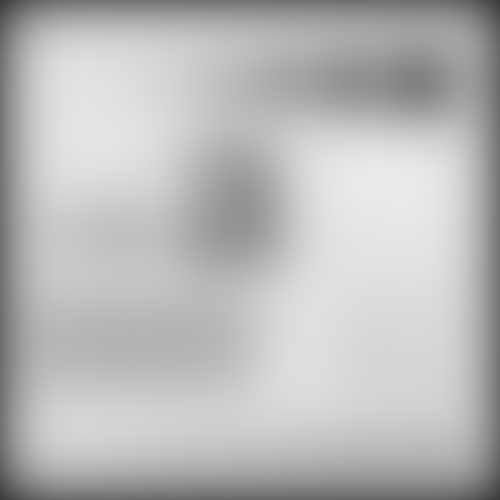

In [ ]:
original_image = cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif", cv2.IMREAD_GRAYSCALE)
cv2_imshow(gaussian_filter(original_image,187,31,'zero'))
#gaussian_blur(original_image, 187, 31,is_show = True)

Now try for mirror padding

**Mirror Padding:**

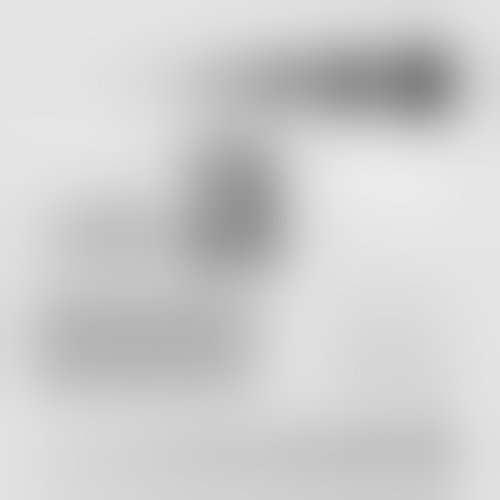

In [ ]:
cv2_imshow(gaussian_filter(original_image, 187, 31, 'mirror'))

And finally try for replicate padding

**Replicate Padding**

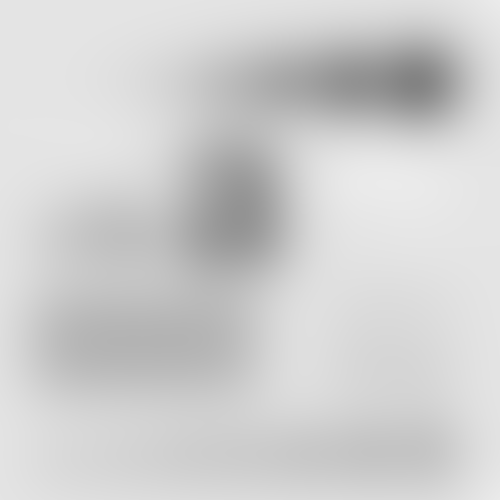

In [ ]:
cv2_imshow(gaussian_filter(original_image, 187, 31, 'replicate'))

#Order Statistics (Non-Linear) Filters
1. Median Filter
2. Max Filter
3. Min Filter

We will do example on median filtering and compare with linear filtering i.e Gaussian Filter

(-0.5, 454.5, 439.5, -0.5)

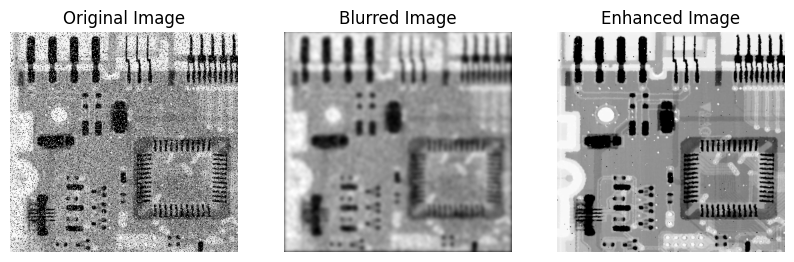

In [ ]:
import numpy as np, matplotlib.pyplot as plt, cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread('/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)

# Median Filtering
def median_filter(image,kernel_size):
  image_rows,image_cols = image.shape
  pad_rows = (kernel_size-1) // 2
  pad_cols = (kernel_size-1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode='reflect')
  output = np.zeros_like(image)

  for row in range(image_rows):
    for col in range(image_cols):
      neighbours = padded_image[row : row + kernel_size, col : col + kernel_size]
      median_val = np.median(np.ravel(neighbours))
      output[row,col] = median_val

  return output

plt.figure(figsize = (10,20))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(original_image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Blurred Image')
plt.imshow(gaussian_blur(original_image,21,3.4), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Enhanced Image')
plt.imshow(median_filter(original_image,3), cmap = 'gray')
plt.axis('off')

#**Sharpening (Highpass) Spatial Filters**
**USING THE SECOND DERIVATIVE FOR IMAGE SHARPENING—THE
LAPLACIAN**

Equation for Laplacian Kernel

∇^2f(x,y)=f(x+1,y)+f(x−1,y)+f(x,y+1)+f(x,y−1)−4f(x,y)

We will implement this equation with the following kernels i.e

0  1  0  ......    1  1  1

1 -4  1  ......     1  -8  1

0  1  0  ......       1   1  1

(-0.5, 465.5, 539.5, -0.5)

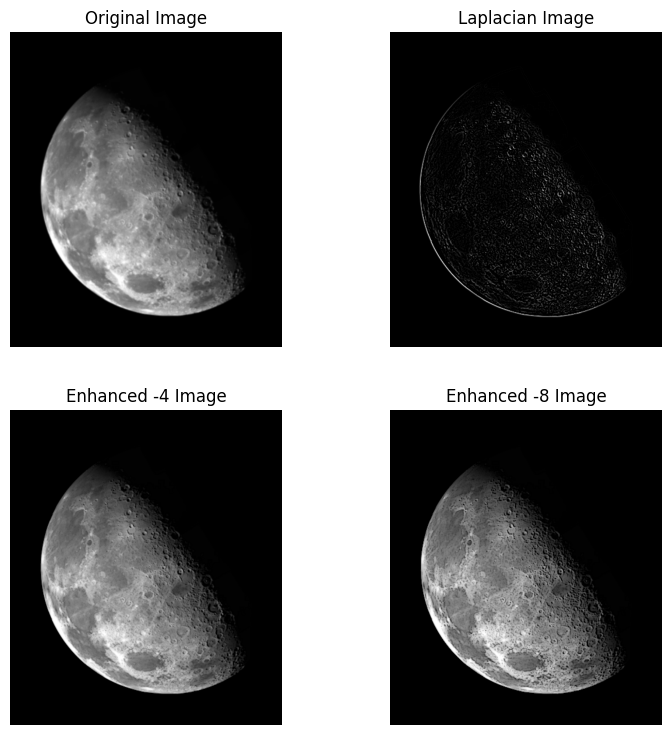

In [ ]:
import numpy as np, matplotlib.pyplot as plt, cv2
from google.colab.patches import cv2_imshow
original_image = cv2.imread(path+'/Fig0338(a)(blurry_moon).tif',cv2.IMREAD_GRAYSCALE)

def laplacian_sharp(image,kernel):
  image_rows,image_cols = image.shape
  kernel_rows,kernel_cols = kernel.shape

  pad_rows = (kernel_rows - 1) // 2
  pad_cols = (kernel_cols - 1) // 2

  padded_image = np.pad(image, ((pad_rows,pad_rows),(pad_cols,pad_cols)),mode = 'reflect')

  output_image = np.zeros_like(image)
  for row in range(image_rows):
    for col in range(image_cols):
      val = np.sum(kernel * padded_image[row : row + kernel_rows, col : col + kernel_cols])
      output_image[row,col] = 0 if val < 0  else val

  return output_image

# create a kernel that implements the above formula for Laplacian Function
laplacian_kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian_kernel2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
c = -1
result1 = laplacian_sharp(original_image,laplacian_kernel1)
result2 = laplacian_sharp(original_image,laplacian_kernel2)
enhanced_image1 = np.where((original_image + (c * result1) < 0),0,original_image + (c * result1))
enhanced_image2 = np.where((original_image + (c * result2) < 0),0,original_image + (c * result2))

plt.figure(figsize= (9,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(original_image, cmap ='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Laplacian Image')
plt.imshow(result1, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Enhanced -4 Image')
plt.imshow(enhanced_image1, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Enhanced -8 Image')
plt.imshow(enhanced_image2, cmap = 'gray')
plt.axis('off')

And if we want to scale the laplacian image to visualized it more perfectly we can use the following formulas for this...

gm = g - min(g)

which creates an image whose minimum value is 0 as by using some of the values will be less than 0, then we perform the operation i.e

gs = K [ gm / max(gm) ]

which creates a scale image whose values are in range [0,255] as K = 8 for 8-bit image.

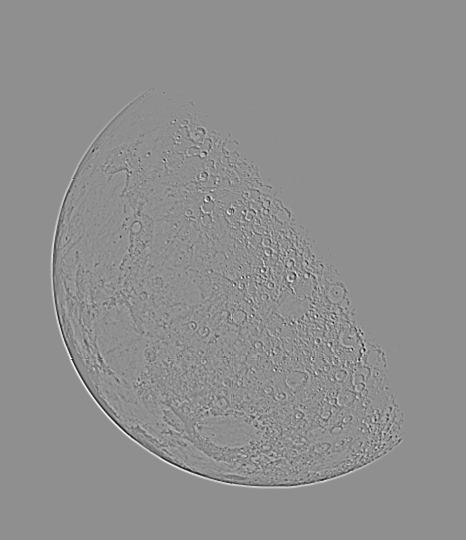

In [ ]:
def laplacian_filter(image,kernel):
  image_rows,image_cols = image.shape
  kernel_rows,kernel_cols = kernel.shape
  pad_rows = (kernel_rows -1) // 2
  pad_cols = (kernel_cols -1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode= 'reflect')
  output_image = np.zeros_like(image,dtype = np.int64)
  for row in range(image_rows):
    for col in range(image_cols):
      output_image[row,col] = np.sum(kernel * padded_image[row : row + kernel_rows, col : col + kernel_cols])
  output_image2 = output_image - np.min(output_image)
  output_image = (output_image2 / np.max(output_image2)) * 255
  return output_image

lap_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
lap_image = laplacian_filter(original_image,lap_kernel)
cv2_imshow(lap_image)

**UNSHARP MASKING AND HIGHBOOST FILTERING**
Subtracting an unsharp (smoothed) version of an image from the original image is
process that has been used since the 1930s by the printing and publishing industry to
sharpen images. This process, called unsharp masking, consists of the following steps:

1.  Blur the original image.
2. Subtract the blur image from the original (the resulting difference is called mask)
3. Add the mask to the original image.

letting b(x,y) denote the blur image, the mask in equation form is given as;

gmask(x,y) = f(x,y) - b(x,y)

Then we add a weighted portion of the mask back to the original image,

g(x,y) = f(x,y) + k * gmask(x,y)

where we include a weight, k(k>=0) for generality
1. when k = 1, we have unsharp masking as define above
2. when k > 1, the process is called highboost filtering
3. when k < 1, reduced the contrbution of the unsharp mask.

**Unsharp masking and highboost filtering example**


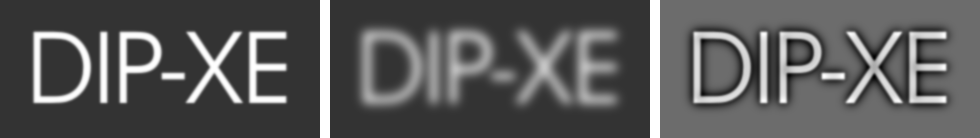

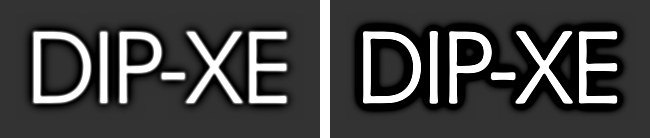

In [ ]:
original_image = cv2.imread(path + '/Fig0340(a)(dipxe_text).tif',cv2.IMREAD_GRAYSCALE)
original_image = original_image.astype(np.float64)
blurred_image = gaussian_filter(original_image,31,5,'mirror')
unsharp_mask = original_image - blurred_image
unsharp_mask1 = unsharp_mask - np.min(unsharp_mask)
unsharp_mask1 = 255 * (unsharp_mask1/np.max(unsharp_mask1))
k = 1
sharp_image1 = original_image + (k * unsharp_mask)
k = 4.5
sharp_image2 = original_image + (k * unsharp_mask)
separator_width = 10  # Adjust as needed
separator = np.ones((original_image.shape[0], separator_width), dtype=np.float64) * 255
cv2_imshow(cv2.hconcat([original_image,separator,blurred_image,separator,unsharp_mask1]))
cv2_imshow(cv2.hconcat([sharp_image1,separator,sharp_image2]))

**USING FIRST-ORDER DERIVATIVES FOR IMAGE SHARPENING—THE
GRADIENT**



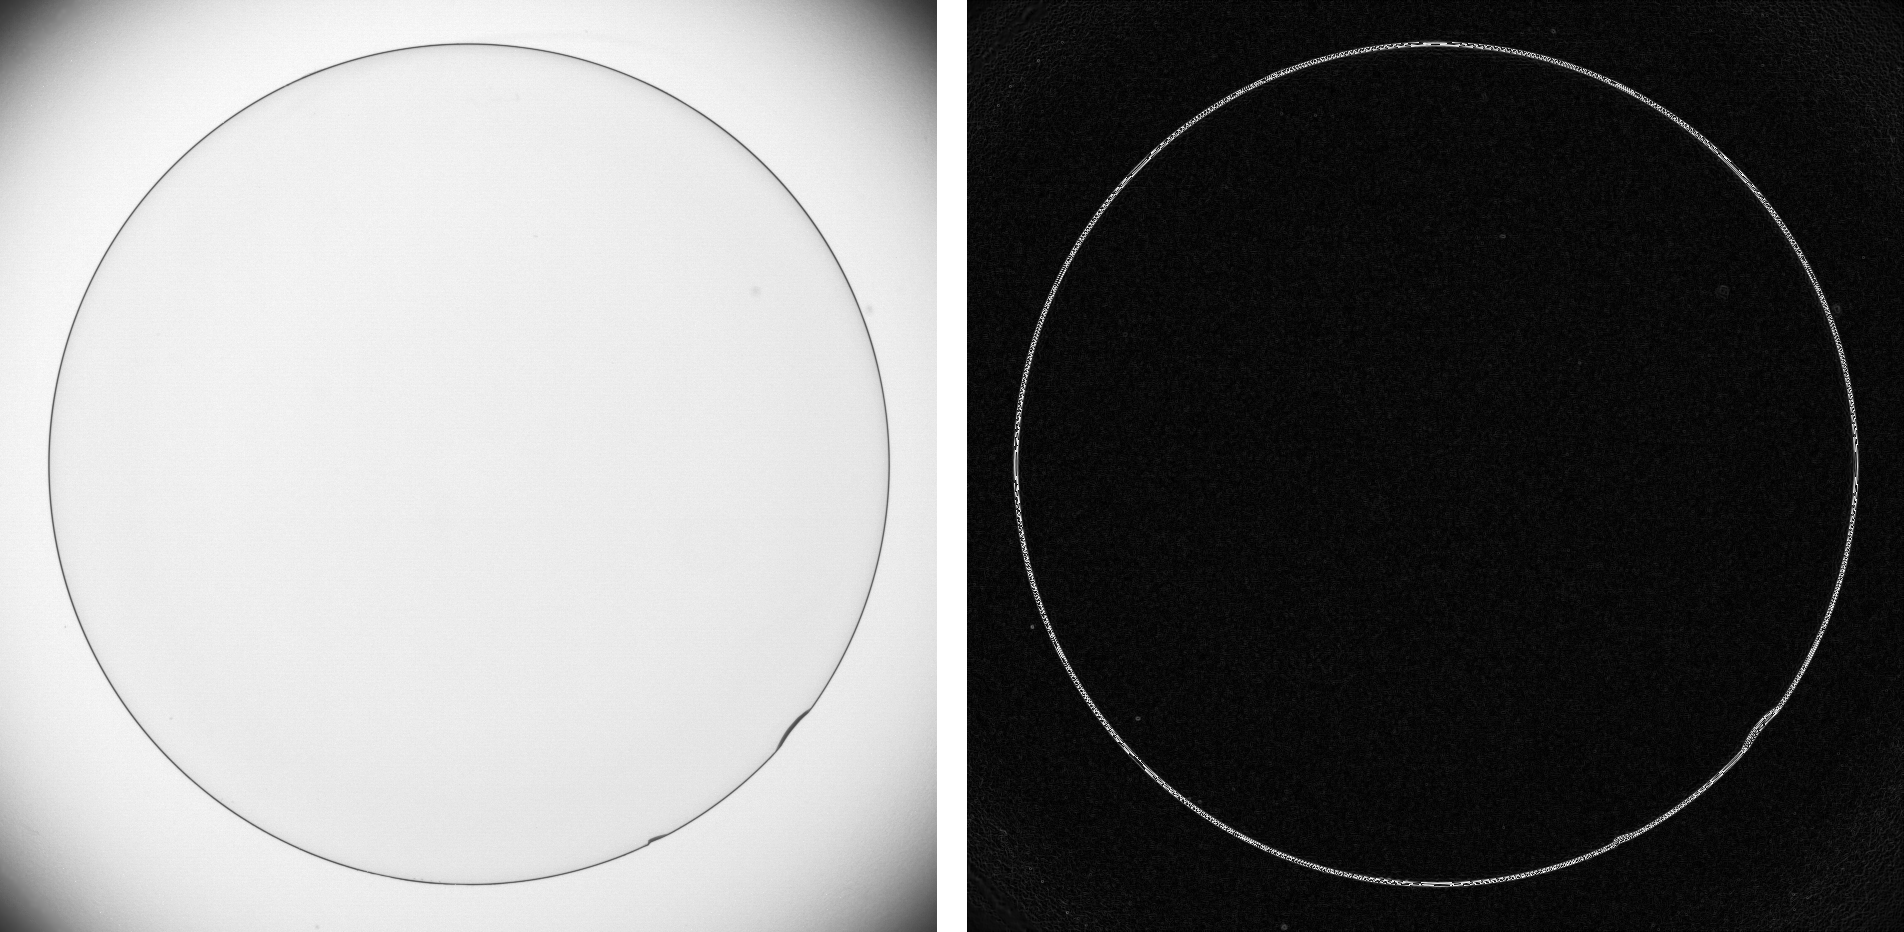

In [ ]:
def gradient_filter(image,kernel_x,kernel_y):
  img_rows,img_cols = image.shape
  k_x_rows,k_x_cols = kernel_x.shape
  k_y_rows,k_y_cols= kernel_y.shape
  pad_rows = (k_x_rows - 1) // 2
  pad_cols = (k_x_cols - 1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode = 'reflect')
  output_image = np.zeros_like(image)

  for row in range(img_rows):
    for col in range(img_cols):
      gx = np.sum(kernel_x * padded_image[row : row + k_x_rows, col : col + k_x_cols])
      gy = np.sum(kernel_y * padded_image[row : row + k_y_rows, col : col + k_y_cols])
      output_image[row,col] = np.sqrt(np.power(gx,2)+np.power(gy,2))
  return output_image
original_image = cv2.imread(path + '/Fig0342(a)(contact_lens_original).tif',cv2.IMREAD_GRAYSCALE)
gradient_x_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gradient_y_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sharp_image = gradient_filter(original_image,gradient_x_kernel,gradient_y_kernel)
separator_width = 30  # Adjust as needed
separator = np.ones((original_image.shape[0], separator_width), dtype=original_image.dtype) * 255
cv2_imshow(cv2.hconcat([original_image,separator,sharp_image]))

#**COMBINING SPATIAL ENHANCEMENT METHODS**

We will use the following image enhancement methods in our following code.
1. Laplacian Filter
2. Gradieant Filter
3. Box Filter on Gradient
4. Multiplication of Laplacian and Blurred Gradient
5. Adddition Original and Result from the multiplication of Laplacian and Blurred Gradiend.
6. Power Law (Gamma) tranformation function

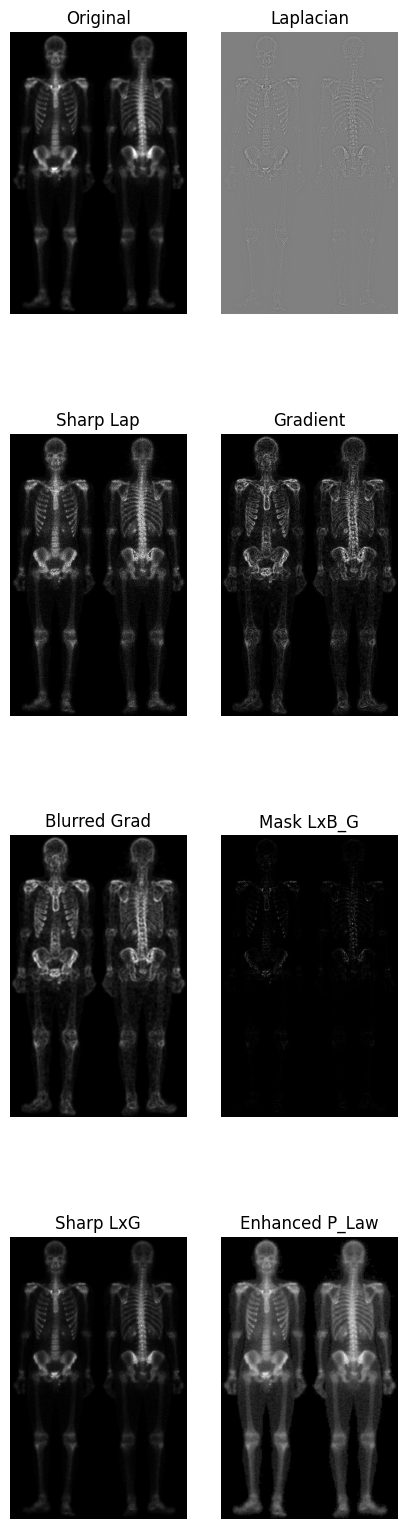

In [ ]:
import matplotlib.pyplot as plt
def laplacian_filter(image,kernel):
  image_rows,image_cols = image.shape
  kernel_rows,kernel_cols = kernel.shape
  pad_rows = (kernel_rows -1) // 2
  pad_cols = (kernel_cols -1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode= 'reflect')
  output_image = np.zeros_like(image,dtype = np.int64)
  for row in range(image_rows):
    for col in range(image_cols):
      output_image[row,col] = np.sum(kernel * padded_image[row : row + kernel_rows, col : col + kernel_cols])
  return output_image

def image_scale(image):
  image2 = image - np.min(image)
  image = 255 * (image2 / np.max(image2))
  return image

original_image = cv2.imread(path + '/Fig0343(a)(skeleton_orig).tif',cv2.IMREAD_GRAYSCALE)
original_image.astype(np.int8)

#Laplacian
laplacian_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
lap_image = laplacian_sharp(original_image,laplacian_kernel)
lap_vis = image_scale(laplacian_filter(original_image,laplacian_kernel))

# Sharpness with only Laplacian
c = 1
lap_sharp_img = original_image + ( c * (lap_image))

#Gradient
gradient_x_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gradient_y_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
grad_image = gradient_filter(original_image,gradient_x_kernel,gradient_y_kernel)

#Blurred Gradient with Box Filter 5x5
blurred_gradient = box_filter(grad_image,5)

# Multiply Blurred Gradiend With Laplacian Image
scaled_lap_image =  lap_image / 255
scaled_blurred_gradient = blurred_gradient / 255
mask_image = (scaled_lap_image * scaled_blurred_gradient) * 255

#Add Multiplying result to the original
sharp_image = original_image + mask_image

# Power Law Transformation function
gamma = 0.5
c = 255
enhanced_image = c * ((sharp_image/255)**gamma)

def show(images,titles):
  plt.figure(figsize = (5,20))
  for i in range(len(images)):
    plt.subplot(4,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')

images = [original_image,lap_vis,lap_sharp_img,grad_image,blurred_gradient,mask_image,sharp_image,enhanced_image]
titles = ['Original','Laplacian','Sharp Lap','Gradient','Blurred Grad','Mask LxB_G','Sharp LxG','Enhanced P_Law']
show(images,titles)

# **Box Filter**


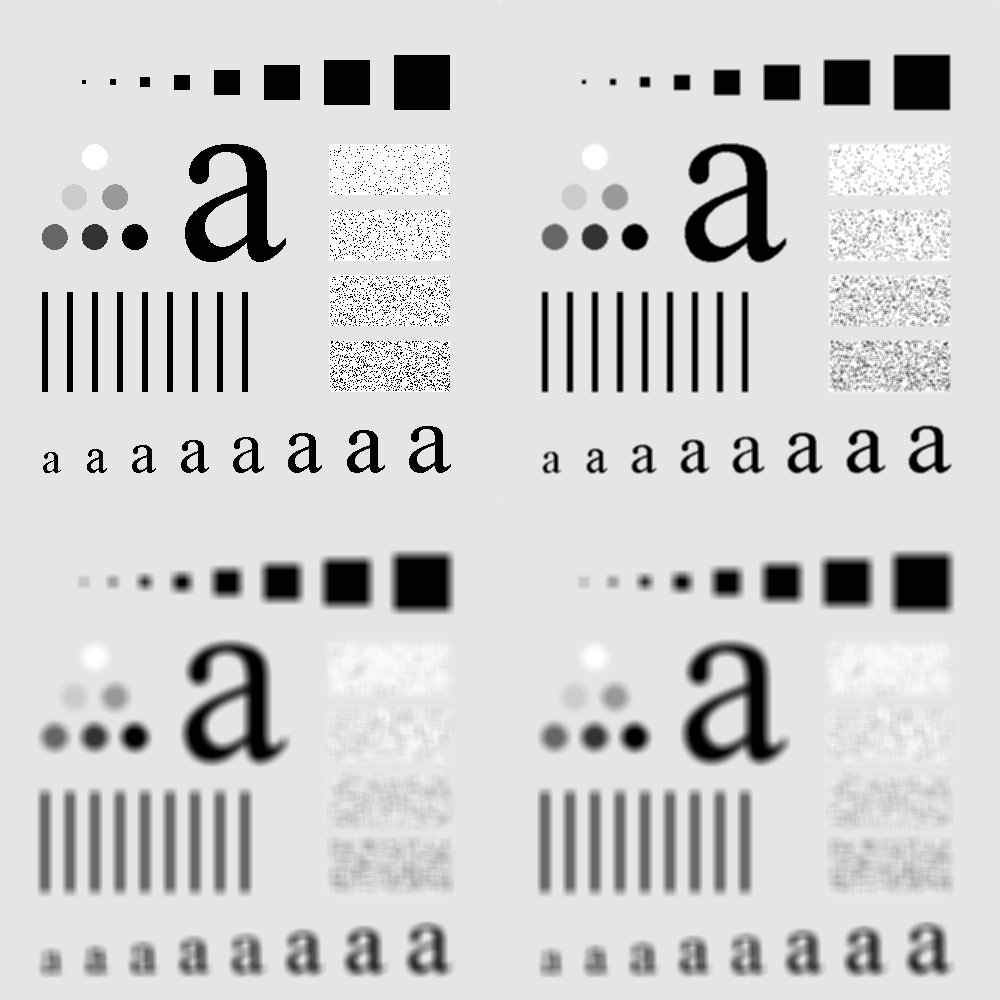

In [ ]:
import cv2,numpy as np, matplotlib as plt
from google.colab.patches import cv2_imshow
original_image = cv2.imread("/content/drive/MyDrive/digital image processing/DIP3E_CH03_Original_Images/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif",cv2.IMREAD_GRAYSCALE)

def box_filter(image,kernel):
  image_rows, image_cols = image.shape
  kernel_rows, kernel_cols = kernel.shape

  pad_rows, pad_cols = (kernel_rows - 1) // 2, (kernel_cols - 1) // 2
  padded_image = np.pad(image,(pad_rows,pad_cols),mode='reflect')

  output_image = np.zeros_like(image)

  for row in range(image_rows):
    for col in range(image_cols):
      neighbor_hood = padded_image[row : row + kernel_rows, col : col + kernel_cols]
      output_image[row,col] = np.sum(kernel * neighbor_hood) / (np.sum(kernel))
  return output_image

kernel1 = np.ones((3,3))
kernel2 = np.ones((11,11))
kernel3 = np.ones((11,11))
blurred1 = box_filter(original_image,kernel1)
blurred2 = box_filter(original_image,kernel2)
blurred3 = box_filter(original_image,kernel3)
cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,blurred1]),cv2.hconcat([blurred2,blurred3])]))